In [1]:
!pip install geopy numpy dbfread
!pip install pandas requests
!pip install matplotlib geopandas shapely


^C
   ---------------------------------------- 125.4/125.4 kB 7.2 MB/s eta 0:00:00
   ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00
     ---------------------------------------- 51.5/51.5 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 1.1/1.1 MB 11.7 MB/s eta 0:00:00
   ---------------------------------------- 1.4/1.4 MB 11.4 MB/s eta 0:00:00
   ---------------------------------------- 22.9/22.9 MB 11.5 MB/s eta 0:00:00
   ---------------------------------------- 6.1/6.1 MB 11.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
from dbfread import DBF
import numpy as np

In [4]:

# Replace 'your_file.dbf' with the path to your actual DBF file
file_path = 'metro.dbf'

# Open and read the DBF file
table = DBF(file_path, load=True)


# Convert to a Pandas DataFrame
df = pd.DataFrame(iter(table))
df_shorten = df[['NAME', 'LINE']]
print(df)
df['LINE'] = df['LINE'].str.split(r',\s*')

df_exploded = df.explode('LINE')

df_exploded.reset_index(drop=True, inplace=True)
print(df_exploded.LINE.unique())

     OBJECTID    GIS_ID                                         NAME  \
0           1  mstn_055                         FRANCONIA-SPRINGF'LD   
1           2  mstn_084               VIRGINIA SQUARE | GMU ELEVATOR   
2           3  mstn_060                         GROSVENOR-STRATHMORE   
3           4  mstn_060                         GROSVENOR-STRATHMORE   
4           5  mstn_010                                DUPONT CIRCLE   
..        ...       ...                                          ...   
228       229  mstn_014                            FEDERAL CENTER SW   
229       230  mstn_012                               FARRAGUT NORTH   
230       231  mstn_012                               FARRAGUT NORTH   
231       232  mstn_027  ARCHIVES | NAVY MEM | PENN QUARTER ELEVATOR   
232       233  mstn_016                           FOGGY BOTTOM | GWU   

                                               WEB_URL  \
0    http://www.wmata.com/rail/station_detail.cfm?s...   
1    http://www.wma

In [6]:
import pandas as pd
import requests
import time


# Function to get latitude and longitude
def get_lat_lon(address):
    url = "https://nominatim.openstreetmap.org/search"
    params = {
        "q": address,
        "format": "json"
    }
    response = requests.get(url, params=params)
    if response.json():
        data = response.json()[0]
        return float(data['lat']), float(data['lon'])
    else:
        return None, None

# Apply the function to each address in the DataFrame, respecting Nominatim's usage policy
# It adds two new columns: 'Latitude' and 'Longitude'
for index, row in df_exploded.iterrows():
    lat, lon = get_lat_lon(row['ADDRESS'])
    df_exploded.at[index, 'Latitude'] = lat
    df_exploded.at[index, 'Longitude'] = lon
    time.sleep(1)  # Sleep to respect the usage policy of not exceeding 1 request per second
df_exploded

,OBJECTID,GIS_ID,NAME,WEB_URL,EXIT_TO_ST,FEATURECOD,DESCRIPTIO,CAPTUREYEA,LINE,ADDRESS_ID,ADDRESS,Latitude,Longitude
0,1,mstn_055,FRANCONIA-SPRINGF'LD,http://www.wmata.com/rail/station_detail.cfm?s...,SOUTH SIDE OF FRANCONIA-SPRINGFIELD PKWY,,Metro Station Entrance,2016-01-08T00:00:00.000Z,blue,,"6880 FRONTIER DRIVE, SPRINGFIELD, VA 22150",38.788017,-77.171600
1,2,mstn_084,VIRGINIA SQUARE | GMU ELEVATOR,http://www.wmata.com/rail/station_detail.cfm?s...,SOUTH SIDE OF N FAIRFAX DR BETWEEN N NELSON ST...,,Metro Station Entrance,2016-01-08T00:00:00.000Z,orange,,"3600 FAIRFAX DRIVE, ARLINGTON, VA 22201",38.882944,-77.103309
2,2,mstn_084,VIRGINIA SQUARE | GMU ELEVATOR,http://www.wmata.com/rail/station_detail.cfm?s...,SOUTH SIDE OF N FAIRFAX DR BETWEEN N NELSON ST...,,Metro Station Entrance,2016-01-08T00:00:00.000Z,silver,,"3600 FAIRFAX DRIVE, ARLINGTON, VA 22201",38.882944,-77.103309
3,3,mstn_060,GROSVENOR-STRATHMORE,http://www.wmata.com/rail/station_detail.cfm?s...,SE OF TUCKERMAN LN AND ROCKVILLE PIKE,,Metro Station Entrance,2016-01-08T00:00:00.000Z,red,,"10300 ROCKVILLE PIKE, ROCKVILLE, MD 20852",39.025901,-77.104257
4,4,mstn_060,GROSVENOR-STRATHMORE,http://www.wmata.com/rail/station_detail.cfm?s...,SW OF TUCKERMAN LN AND ROCKVILLE PIKE,,Metro Station Entrance,2016-01-08T00:00:00.000Z,red,,"10300 ROCKVILLE PIKE, ROCKVILLE, MD 20852",39.025901,-77.104257
...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,232,mstn_027,ARCHIVES | NAVY MEM | PENN QUARTER ELEVATOR,http://www.wmata.com/rail/station_detail.cfm?s...,NW CORNER OF 7TH STREET NW AND PENNSYLVANIA AV...,1370,Metro Station Entrance,2016-01-08T00:00:00.000Z,green,294835,"701 PENNSYLVANIA AVENUE NW, WASHINGTON, DC 20004",38.893682,-77.021915
385,232,mstn_027,ARCHIVES | NAVY MEM | PENN QUARTER ELEVATOR,http://www.wmata.com/rail/station_detail.cfm?s...,NW CORNER OF 7TH STREET NW AND PENNSYLVANIA AV...,1370,Metro Station Entrance,2016-01-08T00:00:00.000Z,yellow,294835,"701 PENNSYLVANIA AVENUE NW, WASHINGTON, DC 20004",38.893682,-77.021915
386,233,mstn_016,FOGGY BOTTOM | GWU,http://www.wmata.com/rail/station_detail.cfm?s...,NW CORNER OF 23RD STREET NW AND I STREET NW,1370,Metro Station Entrance,2016-01-08T00:00:00.000Z,blue,294821,"2301 I STREET NW, WASHINGTON, DC 20037",38.900873,-77.050350
387,233,mstn_016,FOGGY BOTTOM | GWU,http://www.wmata.com/rail/station_detail.cfm?s...,NW CORNER OF 23RD STREET NW AND I STREET NW,1370,Metro Station Entrance,2016-01-08T00:00:00.000Z,orange,294821,"2301 I STREET NW, WASHINGTON, DC 20037",38.900873,-77.050350


In [ ]:
len(df_exploded.NAME.unique())

150

C:\Users\20183822\AppData\Local\Temp\ipykernel_7916\3553163432.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


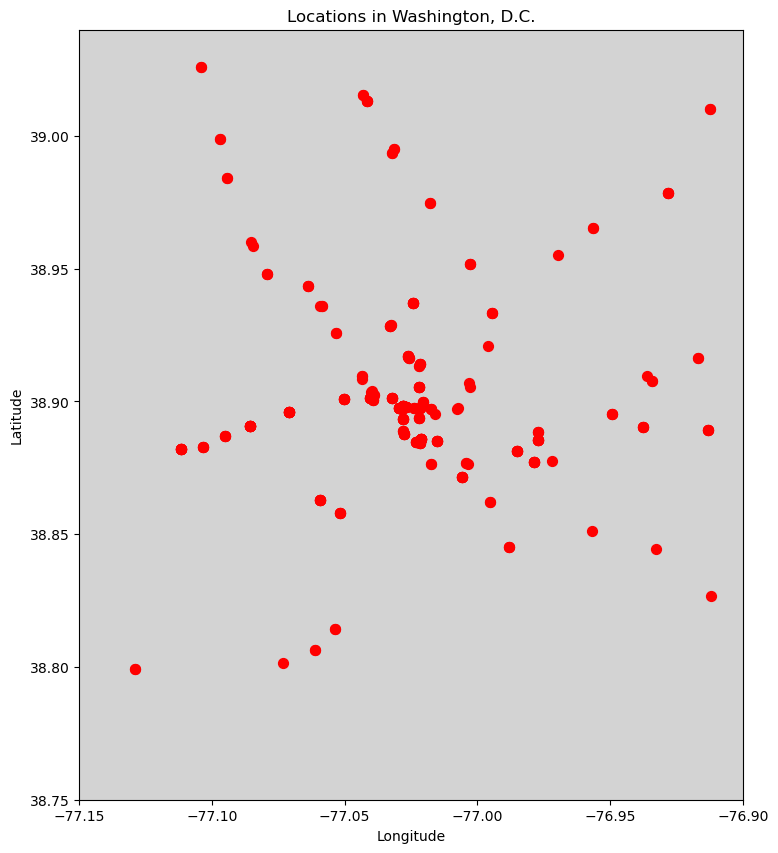

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it includes 'Latitude' and 'Longitude' columns
gdf = gpd.GeoDataFrame(df_exploded, geometry=gpd.points_from_xy(df_exploded.Longitude, df_exploded.Latitude))
# Load a map of the world for background
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Focus on the contiguous United States for background context
usa = world[world.name == "United States of America"]

# Plotting with tighter bounds around Washington, D.C.
fig, ax = plt.subplots(figsize=(10, 10))
usa.plot(ax=ax, color='lightgrey')

# Set the bounds around Washington, D.C. more tightly
# These bounds can be adjusted to better fit the specific locations you're plotting
ax.set_xlim([-77.15, -76.9])
ax.set_ylim([38.75, 39.04])

gdf.plot(ax=ax, color='red', markersize=50)

plt.title('Locations in Washington, D.C.')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

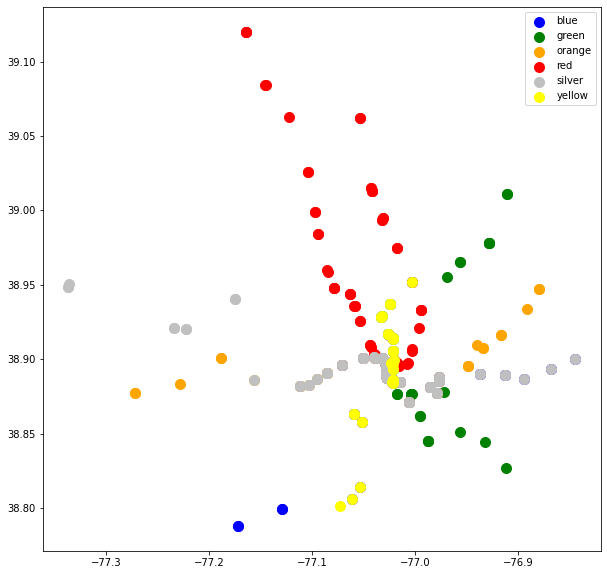

In [28]:
line_colors = {
    'blue': 'blue',
    'orange': 'orange',
    'silver': '#C0C0C0',  # Hex code for silver
    'red': 'red',
    'green': 'green',
    'yellow': 'yellow'
}

# When plotting, use this mapping to set colors
# For example, using the `df_exploded` DataFrame from before
fig, ax = plt.subplots(figsize = (10,10))

for line, group in df_exploded.groupby('LINE'):
    ax.scatter(group['Longitude'], group['Latitude'], s=100, 
               color=line_colors[line], label=line)

ax.legend()
plt.show()


In [31]:
# Step 1: Initial number of rows
initial_row_count = len(df_exploded)

# Step 2: Drop rows where either 'ADDRESS' or 'LINE' is missing
df_exploded_cleaned = df_exploded.dropna(subset=['ADDRESS', 'LINE'])

# Step 3: Number of rows after removal
final_row_count = len(df_exploded_cleaned)

# Step 4: Calculate and print how many rows were removed
rows_removed = initial_row_count - final_row_count
np.random.seed(42)  # For reproducibility
df_exploded_cleaned['VISITORS'] = np.random.lognormal(mean=np.log(10000), sigma=1, size=final_row_count)
df_exploded_cleaned['VISITORS'] = df_exploded_cleaned['VISITORS'].round().astype(int)

df_exploded_cleaned

,OBJECTID,GIS_ID,NAME,WEB_URL,EXIT_TO_ST,FEATURECOD,DESCRIPTIO,CAPTUREYEA,LINE,ADDRESS_ID,ADDRESS,Latitude,Longitude,VISITORS
0,1,mstn_055,FRANCONIA-SPRINGF'LD,http://www.wmata.com/rail/station_detail.cfm?s...,SOUTH SIDE OF FRANCONIA-SPRINGFIELD PKWY,,Metro Station Entrance,2016-01-08T00:00:00.000Z,blue,,"6880 FRONTIER DRIVE, SPRINGFIELD, VA 22150",38.788017,-77.171600,16433
1,2,mstn_084,VIRGINIA SQUARE | GMU ELEVATOR,http://www.wmata.com/rail/station_detail.cfm?s...,SOUTH SIDE OF N FAIRFAX DR BETWEEN N NELSON ST...,,Metro Station Entrance,2016-01-08T00:00:00.000Z,orange,,"3600 FAIRFAX DRIVE, ARLINGTON, VA 22201",38.882944,-77.103309,8709
2,2,mstn_084,VIRGINIA SQUARE | GMU ELEVATOR,http://www.wmata.com/rail/station_detail.cfm?s...,SOUTH SIDE OF N FAIRFAX DR BETWEEN N NELSON ST...,,Metro Station Entrance,2016-01-08T00:00:00.000Z,silver,,"3600 FAIRFAX DRIVE, ARLINGTON, VA 22201",38.882944,-77.103309,19111
3,3,mstn_060,GROSVENOR-STRATHMORE,http://www.wmata.com/rail/station_detail.cfm?s...,SE OF TUCKERMAN LN AND ROCKVILLE PIKE,,Metro Station Entrance,2016-01-08T00:00:00.000Z,red,,"10300 ROCKVILLE PIKE, ROCKVILLE, MD 20852",39.025901,-77.104257,45861
4,4,mstn_060,GROSVENOR-STRATHMORE,http://www.wmata.com/rail/station_detail.cfm?s...,SW OF TUCKERMAN LN AND ROCKVILLE PIKE,,Metro Station Entrance,2016-01-08T00:00:00.000Z,red,,"10300 ROCKVILLE PIKE, ROCKVILLE, MD 20852",39.025901,-77.104257,7912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,232,mstn_027,ARCHIVES | NAVY MEM | PENN QUARTER ELEVATOR,http://www.wmata.com/rail/station_detail.cfm?s...,NW CORNER OF 7TH STREET NW AND PENNSYLVANIA AV...,1370,Metro Station Entrance,2016-01-08T00:00:00.000Z,green,294835,"701 PENNSYLVANIA AVENUE NW, WASHINGTON, DC 20004",38.893682,-77.021915,4681
385,232,mstn_027,ARCHIVES | NAVY MEM | PENN QUARTER ELEVATOR,http://www.wmata.com/rail/station_detail.cfm?s...,NW CORNER OF 7TH STREET NW AND PENNSYLVANIA AV...,1370,Metro Station Entrance,2016-01-08T00:00:00.000Z,yellow,294835,"701 PENNSYLVANIA AVENUE NW, WASHINGTON, DC 20004",38.893682,-77.021915,11623
386,233,mstn_016,FOGGY BOTTOM | GWU,http://www.wmata.com/rail/station_detail.cfm?s...,NW CORNER OF 23RD STREET NW AND I STREET NW,1370,Metro Station Entrance,2016-01-08T00:00:00.000Z,blue,294821,"2301 I STREET NW, WASHINGTON, DC 20037",38.900873,-77.050350,14074
387,233,mstn_016,FOGGY BOTTOM | GWU,http://www.wmata.com/rail/station_detail.cfm?s...,NW CORNER OF 23RD STREET NW AND I STREET NW,1370,Metro Station Entrance,2016-01-08T00:00:00.000Z,orange,294821,"2301 I STREET NW, WASHINGTON, DC 20037",38.900873,-77.050350,65285


In [33]:
df_exploded_unique = df_exploded_cleaned.drop_duplicates(subset=['LINE', 'Longitude', 'Latitude'])

# Display the DataFrame after removing duplicates
df_exploded_unique

,OBJECTID,GIS_ID,NAME,WEB_URL,EXIT_TO_ST,FEATURECOD,DESCRIPTIO,CAPTUREYEA,LINE,ADDRESS_ID,ADDRESS,Latitude,Longitude,VISITORS
0,1,mstn_055,FRANCONIA-SPRINGF'LD,http://www.wmata.com/rail/station_detail.cfm?s...,SOUTH SIDE OF FRANCONIA-SPRINGFIELD PKWY,,Metro Station Entrance,2016-01-08T00:00:00.000Z,blue,,"6880 FRONTIER DRIVE, SPRINGFIELD, VA 22150",38.788017,-77.171600,16433
1,2,mstn_084,VIRGINIA SQUARE | GMU ELEVATOR,http://www.wmata.com/rail/station_detail.cfm?s...,SOUTH SIDE OF N FAIRFAX DR BETWEEN N NELSON ST...,,Metro Station Entrance,2016-01-08T00:00:00.000Z,orange,,"3600 FAIRFAX DRIVE, ARLINGTON, VA 22201",38.882944,-77.103309,8709
2,2,mstn_084,VIRGINIA SQUARE | GMU ELEVATOR,http://www.wmata.com/rail/station_detail.cfm?s...,SOUTH SIDE OF N FAIRFAX DR BETWEEN N NELSON ST...,,Metro Station Entrance,2016-01-08T00:00:00.000Z,silver,,"3600 FAIRFAX DRIVE, ARLINGTON, VA 22201",38.882944,-77.103309,19111
3,3,mstn_060,GROSVENOR-STRATHMORE,http://www.wmata.com/rail/station_detail.cfm?s...,SE OF TUCKERMAN LN AND ROCKVILLE PIKE,,Metro Station Entrance,2016-01-08T00:00:00.000Z,red,,"10300 ROCKVILLE PIKE, ROCKVILLE, MD 20852",39.025901,-77.104257,45861
5,5,mstn_010,DUPONT CIRCLE,http://www.wmata.com/rail/station_detail.cfm?s...,SE CORNER OF 19TH STREET NW AND DUPONT CIRCLE NW,1370,Metro Station Entrance,2016-01-08T00:00:00.000Z,red,294836,"1351 19TH ST NW, WASHINGTON, DC 20036",38.908494,-77.043328,7913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,227,mstn_013,FARRAGUT WEST,http://www.wmata.com/rail/station_detail.cfm?s...,SE CORNER OF 17TH STREET NW AND I STREET NW,1370,Metro Station Entrance,2016-01-08T00:00:00.000Z,blue,294819,"837 17TH STREET NW, WASHINGTON, DC 20006",38.900657,-77.039339,26098
374,227,mstn_013,FARRAGUT WEST,http://www.wmata.com/rail/station_detail.cfm?s...,SE CORNER OF 17TH STREET NW AND I STREET NW,1370,Metro Station Entrance,2016-01-08T00:00:00.000Z,orange,294819,"837 17TH STREET NW, WASHINGTON, DC 20006",38.900657,-77.039339,86122
375,227,mstn_013,FARRAGUT WEST,http://www.wmata.com/rail/station_detail.cfm?s...,SE CORNER OF 17TH STREET NW AND I STREET NW,1370,Metro Station Entrance,2016-01-08T00:00:00.000Z,silver,294819,"837 17TH STREET NW, WASHINGTON, DC 20006",38.900657,-77.039339,4642
382,230,mstn_012,FARRAGUT NORTH,http://www.wmata.com/rail/station_detail.cfm?s...,SW CORNER OF L STREET NW AND CONNECTICUT AVENU...,1370,Metro Station Entrance,2016-01-08T00:00:00.000Z,red,294828,"1720 L STREET NW, WASHINGTON, DC 20036",38.903659,-77.040200,1196


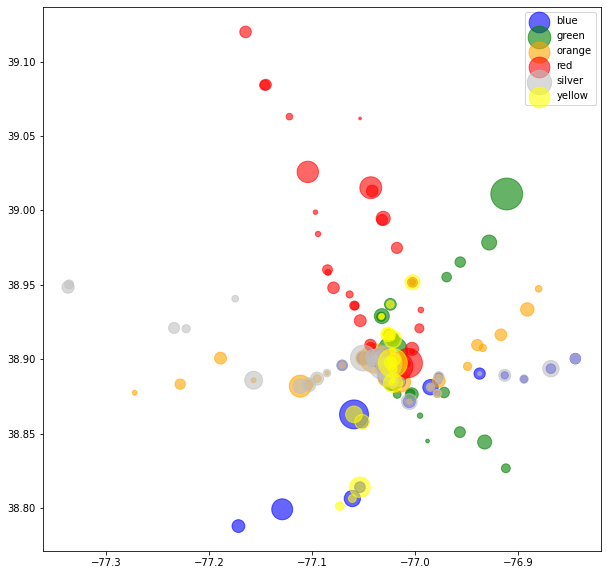

In [34]:
# Adjust the scatter plot to use 'VISITORS' for dot sizes
fig, ax = plt.subplots(figsize=(10, 10))

for line, group in df_exploded_unique.groupby('LINE'):
    # Scale the 'VISITORS' values for better visualization, if needed
    ax.scatter(group['Longitude'], group['Latitude'], s=group['VISITORS'] / 100, 
               color=line_colors[line], label=line, alpha=0.6)

ax.legend()
plt.show()

In [ ]:
df_exploded_unique.to_csv('visitors_Metrostations.csv', index = False)

Analysis of total visitors, code only needed when we want the correct data

In [ ]:
parking = pd.read_csv('Txns by Year_Full Data_data.csv', sep = ';')
print(parking.Station.unique())
parking[parking['Station'] == 'Ashburn']

parking_grouped = parking.groupby('Station')['Transaction Count'].sum().reset_index(name='TotalTransactions')
parking_grouped

['Anacostia' 'Deanwood' 'Rhode Island Ave' 'Fort Totten' 'Minnesota Ave'
 'Grosvenor-Strathmore' 'North Bethesda' 'Twinbrook' 'Rockville'
 'Forest Glen' 'Shady Grove' 'Wheaton' 'Glenmont' 'Branch Ave' 'Suitland'
 'Southern Ave' 'Naylor Road' 'Downtown Largo' 'Capitol Heights'
 'Morgan Boulevard' 'Addison Road' 'Cheverly' 'Landover' 'New Carrollton'
 'West Hyattsville' 'Hyattsville Crossing' 'College Park-U of Md'
 'Greenbelt' 'Van Dorn Street' 'East Falls Church' 'Huntington'
 'Franconia-Springfield' 'Dunn Loring' 'West Falls Church' 'Vienna'
 'Wiehle-Reston East' 'Herndon' 'Innovation Center' 'Loudoun Gateway'
 'Ashburn']


,Station,TotalTransactions
0,Addison Road,5096
1,Anacostia,8522
2,Ashburn,16801
3,Branch Ave,41320
4,Capitol Heights,6573
5,Cheverly,4642
6,College Park-U of Md,13690
7,Deanwood,1532
8,Downtown Largo,30097
9,Dunn Loring,14406


In [ ]:
df_exploded_stations_list = df_exploded.NAME.unique()
parking_stations_list = parking.Station.str.upper().unique()
print(df_exploded_stations_list)
df_exploded[df_exploded['NAME']=='NOMA | GALLAUDET U | NEW YORK AVE']

["FRANCONIA-SPRINGF'LD" 'VIRGINIA SQUARE | GMU ELEVATOR'
 'GROSVENOR-STRATHMORE' 'DUPONT CIRCLE' 'BALLSTON ELEVATOR' 'CLARENDON'
 'CLARENDON ELEVATOR' 'BENNING ROAD ELEVATOR' 'COURT HOUSE ELEVATOR'
 'COURT HOUSE' 'DUNN LORING' 'VIENNA | FAIRFAX-GMU' 'BROOKLAND | CUA'
 'CAPITOL HEIGHTS ELEVATOR' 'ADDISON ROAD | SEAT PLEASANT' 'FORT TOTTEN'
 'ANACOSTIA' 'CONGRESS HEIGHTS' 'SOUTHERN AVE' 'NAYLOR ROAD'
 'BENNING ROAD' 'CAPITOL HEIGHTS' 'GREENSBORO' 'GREENSBORO ELEVATOR'
 'W FALLS CHURVH | VT | UVA' 'CHEVERLY ELEVATOR' 'MINNESOTA AVE'
 'PENTAGON' 'EISENHOWER AVENUE' 'HUNTINGTON' 'KING STREET'
 'COLUMBIA HEIGHTS ELEVATOR' 'CHEVERLY' 'COLLEGE PARK ELEVATOR'
 'MORGAN BOULEVARD' 'CONGRESS HEIGHTS ELEVATOR' 'DEANWOOD ELEVATOR'
 'FEDERAL CENTER SW ELEVATOR' 'FOREST GLEN' 'GLENMONT' 'GLENMONT ELEVATOR'
 'MINNESOTA AVE ELEVATOR' 'NAVY YARD-BALLPARK ELEVATOR'
 'SHAW | HOWARD UNIV ELEVATOR'
 'U ST | AFRICAN AMER CIVIL WAR MEM | CARDOZO ELEV' 'VAN DORN ST'
 'VIRGINIA SQUARE | GMU' 'WATERFRONT ELEVATOR

,OBJECTID,GIS_ID,NAME,WEB_URL,EXIT_TO_ST,FEATURECOD,DESCRIPTIO,CAPTUREYEA,LINE,ADDRESS_ID,ADDRESS,Latitude,Longitude
95,68,mstn_029,NOMA | GALLAUDET U | NEW YORK AVE,http://www.wmata.com/rail/station_detail.cfm?s...,NORTH SIDE OF M STREET NE AT INTERSECTION WITH...,1370,Metro Station Entrance,2016-01-08T00:00:00.000Z,red,294857,"201 M STREET NE, WASHINGTON, DC 20002",38.905399,-77.002894
308,189,mstn_029,NOMA | GALLAUDET U | NEW YORK AVE,http://www.wmata.com/rail/station_detail.cfm?s...,EAST SIDE OF 2ND STREET NE AT INTERSECTION WIT...,1370,Metro Station Entrance,2016-01-08T00:00:00.000Z,red,294857,"200 FLORIDA AVENUE NE, WASHINGTON, DC 20002",38.907025,-77.003153


In [ ]:
station_links = {
    "FRANCONIA-SPRINGF'LD": 'Franconia-Springfield',
    'VIRGINIA SQUARE | GMU ELEVATOR': 'Virginia Square-GMU',
    'GROSVENOR-STRATHMORE': 'Grosvenor-Strathmore',
    'DUPONT CIRCLE': 'Dupont Circle',
    'BALLSTON ELEVATOR': 'Ballston',
    'CLARENDON': 'Clarendon',
    'CLARENDON ELEVATOR': 'Clarendon',
    'BENNING ROAD ELEVATOR': 'Benning Road',
    'COURT HOUSE ELEVATOR': 'Court House',
    'COURT HOUSE': 'Court House',
    'DUNN LORING': 'Dunn Loring',
    'VIENNA | FAIRFAX-GMU': 'Vienna',
    'BROOKLAND | CUA': 'Brookland-CUA',
    'CAPITOL HEIGHTS ELEVATOR': 'Capitol Heights',
    'ADDISON ROAD | SEAT PLEASANT': 'Addison Road',
    'FORT TOTTEN': 'Fort Totten',
    'ANACOSTIA': 'Anacostia',
    'CONGRESS HEIGHTS': 'Congress Heights',
    'SOUTHERN AVE': 'Southern Ave',
    'NAYLOR ROAD': 'Naylor Road',
    'BENNING ROAD': 'Benning Road',
    'CAPITOL HEIGHTS': 'Capitol Heights',
    'GREENSBORO': 'Greensboro',
    'GREENSBORO ELEVATOR': 'Greensboro',
    'W FALLS CHURVH | VT | UVA': 'West Falls Church',
    'CHEVERLY ELEVATOR': 'Cheverly',
    'MINNESOTA AVE': 'Minnesota Ave',
    'PENTAGON': 'Pentagon',
    'EISENHOWER AVENUE': 'Eisenhower Avenue',
    'HUNTINGTON': 'Huntington',
    'KING STREET': 'King Street',
    'COLUMBIA HEIGHTS ELEVATOR': 'Columbia Heights',
    'CHEVERLY': 'Cheverly',
    'COLLEGE PARK ELEVATOR': 'College Park-U of Md',
    'MORGAN BOULEVARD': 'Morgan Boulevard',
    'CONGRESS HEIGHTS ELEVATOR': 'Congress Heights',
    'DEANWOOD ELEVATOR': 'Deanwood',
    'FEDERAL CENTER SW ELEVATOR': 'Federal Center SW',
    'FOREST GLEN': 'Forest Glen',
    'GLENMONT': 'Glenmont',
    'GLENMONT ELEVATOR': 'Glenmont',
    'MINNESOTA AVE ELEVATOR': 'Minnesota Ave',
    'NAVY YARD-BALLPARK ELEVATOR': 'Navy Yard-Ballpark',
    'SHAW | HOWARD UNIV ELEVATOR': 'Shaw-Howard Univ',
    'U ST | AFRICAN AMER CIVIL WAR MEM | CARDOZO ELEV': 'U Street',
    'VAN DORN ST': 'Van Dorn Street',
    'VIRGINIA SQUARE | GMU': 'Virginia Square-GMU',
    'WATERFRONT ELEVATOR': 'Waterfront',
    'NEW CARROLLTON': 'New Carrollton',
    'GEORGIA AVE | PETWORTH': 'Georgia Ave-Petworth',
    'GEORGIA AVE | PETWORTH ELEVATOR': 'Georgia Ave-Petworth',
    'BROOKLAND | CUA ELEVATOR': 'Brookland-CUA',
    'TYSONS CORNER ELEVATOR': 'Tysons Corner',
    'NOMA | GALLAUDET U | NEW YORK AVE': 'NoMa-Gallaudet U',
    'JUDICIARY SQUARE NE ELEVATOR': 'Judiciary Square',
    'JUDICIARY SQUARE SW ELEVATOR': 'Judiciary Square',
    'EASTERN MARKET': 'Eastern Market',
    'SPRING HILL ELEVATOR': 'Spring Hill',
    'WIEHLE | RESTON EAST ELEVATOR': 'Wiehle-Reston'}


,OBJECTID,GIS_ID,NAME,WEB_URL,EXIT_TO_ST,FEATURECOD,DESCRIPTIO,CAPTUREYEA,LINE,ADDRESS_ID,ADDRESS,Latitude,Longitude
0,1,mstn_055,FRANCONIA-SPRINGF'LD,http://www.wmata.com/rail/station_detail.cfm?s...,SOUTH SIDE OF FRANCONIA-SPRINGFIELD PKWY,,Metro Station Entrance,2016-01-08T00:00:00.000Z,blue,,"6880 FRONTIER DRIVE, SPRINGFIELD, VA 22150",38.788017,-77.171600
1,2,mstn_084,VIRGINIA SQUARE | GMU ELEVATOR,http://www.wmata.com/rail/station_detail.cfm?s...,SOUTH SIDE OF N FAIRFAX DR BETWEEN N NELSON ST...,,Metro Station Entrance,2016-01-08T00:00:00.000Z,orange,,"3600 FAIRFAX DRIVE, ARLINGTON, VA 22201",38.882944,-77.103309
2,2,mstn_084,VIRGINIA SQUARE | GMU ELEVATOR,http://www.wmata.com/rail/station_detail.cfm?s...,SOUTH SIDE OF N FAIRFAX DR BETWEEN N NELSON ST...,,Metro Station Entrance,2016-01-08T00:00:00.000Z,silver,,"3600 FAIRFAX DRIVE, ARLINGTON, VA 22201",38.882944,-77.103309
3,3,mstn_060,grosvenor-strathmore,http://www.wmata.com/rail/station_detail.cfm?s...,SE OF TUCKERMAN LN AND ROCKVILLE PIKE,,Metro Station Entrance,2016-01-08T00:00:00.000Z,red,,"10300 ROCKVILLE PIKE, ROCKVILLE, MD 20852",39.025901,-77.104257
4,4,mstn_060,grosvenor-strathmore,http://www.wmata.com/rail/station_detail.cfm?s...,SW OF TUCKERMAN LN AND ROCKVILLE PIKE,,Metro Station Entrance,2016-01-08T00:00:00.000Z,red,,"10300 ROCKVILLE PIKE, ROCKVILLE, MD 20852",39.025901,-77.104257
...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,232,mstn_027,ARCHIVES | NAVY MEM | PENN QUARTER ELEVATOR,http://www.wmata.com/rail/station_detail.cfm?s...,NW CORNER OF 7TH STREET NW AND PENNSYLVANIA AV...,1370,Metro Station Entrance,2016-01-08T00:00:00.000Z,green,294835,"701 PENNSYLVANIA AVENUE NW, WASHINGTON, DC 20004",38.893682,-77.021915
385,232,mstn_027,ARCHIVES | NAVY MEM | PENN QUARTER ELEVATOR,http://www.wmata.com/rail/station_detail.cfm?s...,NW CORNER OF 7TH STREET NW AND PENNSYLVANIA AV...,1370,Metro Station Entrance,2016-01-08T00:00:00.000Z,yellow,294835,"701 PENNSYLVANIA AVENUE NW, WASHINGTON, DC 20004",38.893682,-77.021915
386,233,mstn_016,FOGGY BOTTOM | GWU,http://www.wmata.com/rail/station_detail.cfm?s...,NW CORNER OF 23RD STREET NW AND I STREET NW,1370,Metro Station Entrance,2016-01-08T00:00:00.000Z,blue,294821,"2301 I STREET NW, WASHINGTON, DC 20037",38.900873,-77.050350
387,233,mstn_016,FOGGY BOTTOM | GWU,http://www.wmata.com/rail/station_detail.cfm?s...,NW CORNER OF 23RD STREET NW AND I STREET NW,1370,Metro Station Entrance,2016-01-08T00:00:00.000Z,orange,294821,"2301 I STREET NW, WASHINGTON, DC 20037",38.900873,-77.050350


StopIteration: 

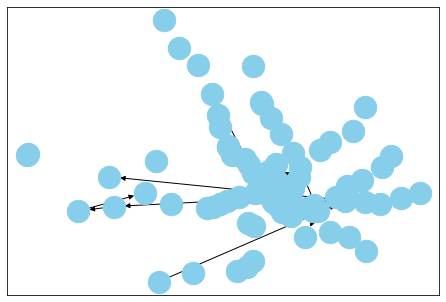

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Load the dataset
data = pd.read_csv("visitors_Metrostations.csv")

# Create a directed graph
G = nx.DiGraph()

# Add nodes for each station
for index, row in data.iterrows():
    G.add_node(row['NAME'], pos=(row['Longitude'], row['Latitude']))

# Add edges between stations based on line connections
lines = data['LINE'].unique()
for line in lines:
    line_data = data[data['LINE'] == line]
    stations = line_data['NAME'].tolist()
    for i in range(len(stations) - 1):
        G.add_edge(stations[i], stations[i+1])

# Draw the metro map
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=8)
plt.show()


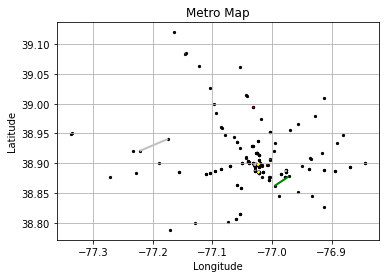

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, LineString

# Load the dataset
data = pd.read_csv("visitors_Metrostations.csv")

# Convert latitude and longitude to Points
data['geometry'] = data.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

# Group data by station name and line color
grouped_data = data.groupby(['NAME', 'LINE'])['geometry'].apply(list).reset_index()

# Create LineStrings for each station's route
station_routes = {}
for index, row in grouped_data.iterrows():
    station_name = row['NAME']
    line_color = row['LINE']
    points = row['geometry']
    # Check if there are at least two valid points
    valid_points = [point for point in points if not point.is_empty]
    if len(valid_points) > 1:
        # Extract coordinates as tuples (x, y)
        coordinates = [(point.x, point.y) for point in valid_points]
        station_routes.setdefault(station_name, []).append((line_color, coordinates))

# Plot the metro lines
fig, ax = plt.subplots()
for station, routes in station_routes.items():
    for route in routes:
        line_color, coordinates = route
        line = LineString(coordinates)
        gdf = gpd.GeoDataFrame(geometry=[line])
        gdf.plot(ax=ax, color=line_color, linewidth=2)

# Plot the stations
data_points = gpd.GeoDataFrame(data)
data_points.plot(ax=ax, color='black', markersize=5)

plt.title('Metro Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


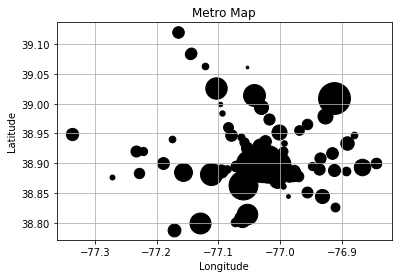

In [18]:
# Group data by station name, line color, and visitors
grouped_data = data.groupby(['NAME', 'LINE', 'VISITORS'])['geometry'].apply(list).reset_index()

# Create LineStrings for each station's route
station_routes = {}
for index, row in grouped_data.iterrows():
    station_name = row['NAME']
    line_color = row['LINE']
    visitors = row['VISITORS']
    points = row['geometry']
    # Check if there are at least two valid points
    valid_points = [point for point in points if not point.is_empty]
    if len(valid_points) > 1:
        # Extract coordinates as tuples (x, y)
        coordinates = [(point.x, point.y) for point in valid_points]
        station_routes.setdefault(station_name, []).append((line_color, coordinates, visitors))

# Plot the metro lines
fig, ax = plt.subplots()
for station, routes in station_routes.items():
    for route in routes:
        line_color, coordinates, visitors = route
        line = LineString(coordinates)
        gdf = gpd.GeoDataFrame(geometry=[line])
        gdf.plot(ax=ax, color=line_color, linewidth=2)
        # Plot the station name with size relative to the number of visitors
        ax.annotate(station, xy=(coordinates[0][0], coordinates[0][1]), fontsize=visitors/500, ha='right')

# Plot the stations with size relative to the number of visitors
data_points = gpd.GeoDataFrame(data)
for index, row in data_points.iterrows():
    ax.scatter(row['Longitude'], row['Latitude'], color='black', s=row['VISITORS']/100, label=row['NAME'])

plt.title('Metro Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


NAME            ADDISON ROAD | SEAT PLEASANT
LINE                                    blue
VISITORS                                5479
geometry    [POINT (-76.8944056 38.8867225)]
Name: 0, dtype: object
NAME            ADDISON ROAD | SEAT PLEASANT
LINE                                  silver
VISITORS                                7470
geometry    [POINT (-76.8944056 38.8867225)]
Name: 1, dtype: object
NAME                               ANACOSTIA
LINE                                   green
VISITORS                                2950
geometry    [POINT (-76.9953319 38.8621924)]
Name: 2, dtype: object
NAME                               ANACOSTIA
LINE                                   green
VISITORS                               11202
geometry    [POINT (-76.9719771 38.8777394)]
Name: 3, dtype: object
NAME        ARCHIVES | NAVY MEM | PENN QUARTER
LINE                                     green
VISITORS                                 42782
geometry      [POINT (-77.0219151 38.8936824)]


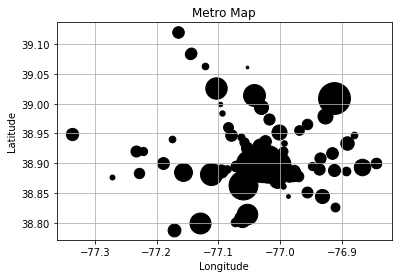

In [19]:
# Create LineStrings for each station's route
station_routes = {}

for index, row in grouped_data.iterrows():
    print(row)
    station_name = row['NAME']
    line_color = row['LINE']
    visitors = row['VISITORS']
    points = row['geometry']
    # Check if there are at least two valid points
    valid_points = [point for point in points if not point.is_empty]
    if len(valid_points) > 1:
        # Extract coordinates as tuples (x, y)
        coordinates = [(point.x, point.y) for point in valid_points]
        station_routes.setdefault(station_name, []).append((line_color, coordinates, visitors))

# Plot the metro lines
fig, ax = plt.subplots()
for station, routes in station_routes.items():
    for route in routes:
        line_color, coordinates, visitors = route
        line = LineString(coordinates)
        gdf = gpd.GeoDataFrame(geometry=[line])
        gdf.plot(ax=ax, color=line_color, linewidth=2)
        # Plot the station name with size relative to the number of visitors
        ax.annotate(station, xy=(coordinates[0][0], coordinates[0][1]), fontsize=visitors/500, ha='right')

# Plot the stations with size relative to the number of visitors
data_points = gpd.GeoDataFrame(data)
for index, row in data_points.iterrows():
    ax.scatter(row['Longitude'], row['Latitude'], color='black', s=row['VISITORS']/100, label=row['NAME'])

plt.title('Metro Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


NameError: name 'line_colors' is not defined

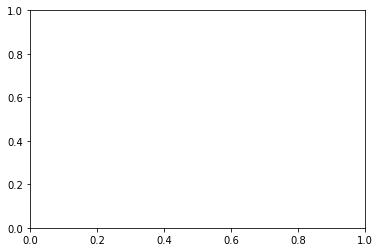

In [27]:
# Group data by station name, line color, and visitors
grouped_data = data.groupby(['NAME', 'LINE', 'VISITORS'])['geometry'].apply(list).reset_index()

# Create LineStrings for each station's route
station_routes = {}
for index, row in grouped_data.iterrows():
    station_name = row['NAME']
    line_color = row['LINE']
    visitors = row['VISITORS']
    points = row['geometry']
    # Check if there are at least two valid points
    valid_points = [point for point in points if not point.is_empty]
    if len(valid_points) > 1:
        # Extract coordinates as tuples (x, y)
        coordinates = [(point.x, point.y) for point in valid_points]
        station_routes.setdefault(line_color, []).append((coordinates, visitors))

# Plot the metro lines
fig, ax = plt.subplots()
for line_color, routes in station_routes.items():
    for route in routes:
        coordinates, visitors = route
        line = LineString(coordinates)
        gdf = gpd.GeoDataFrame(geometry=[line])
        gdf.plot(ax=ax, color=line_color, linewidth=2)
        # Plot the station name with size relative to the number of visitors
        ax.annotate(station, xy=(coordinates[0][0], coordinates[0][1]), fontsize=visitors/500, ha='right')

# Plot the stations with size relative to the number of visitors
data_points = gpd.GeoDataFrame(data)
for index, row in data_points.iterrows():
    ax.scatter(row['Longitude'], row['Latitude'], s=row['VISITORS']/100, color=line_colors[line], label=line, alpha=0.6)

plt.title('Metro Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


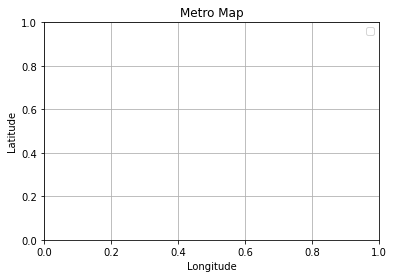

In [24]:
# Create LineStrings for each station's route
station_routes = {}
for index, row in grouped_data.iterrows():
    station_name = row['NAME']
    line_color = row['LINE']
    visitors = row['VISITORS']
    points = row['geometry']
    # Check if there are at least two valid points
    valid_points = [point for point in points if not point.is_empty]
    if len(valid_points) > 1:
        # Extract coordinates as tuples (x, y)
        coordinates = [(point.x, point.y) for point in valid_points]
        station_routes.setdefault(line_color, {}).setdefault(station_name, []).extend(coordinates)

# Plot the metro lines
fig, ax = plt.subplots()
for line_color, stations in station_routes.items():
    for station, coordinates in stations.items():
        # Plot station points
        ax.scatter([coord[0] for coord in coordinates], [coord[1] for coord in coordinates], color='black', s=50, label=station)
    # Connect stations with lines of corresponding color
    for station in stations.values():
        ax.plot([coord[0] for coord in station], [coord[1] for coord in station], color=line_color, linewidth=2)

plt.title('Metro Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()
plt.show()


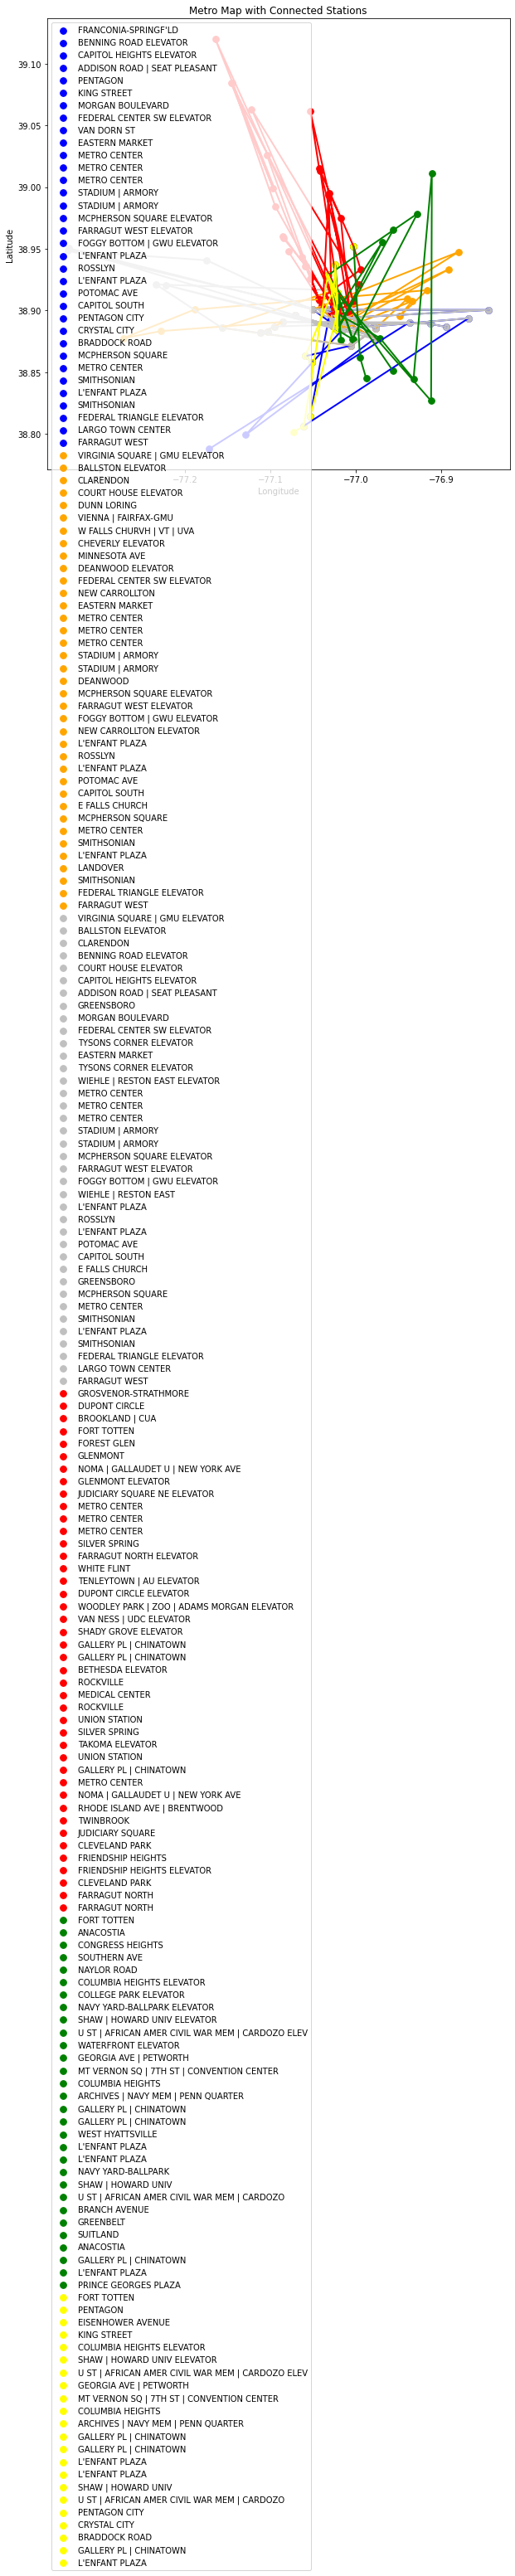

In [37]:
# Create LineStrings for each station's route
station_routes = {}
for index, row in df_exploded_unique.iterrows():
    station_name = row['NAME']
    line_color = row['LINE']
    visitors = row['VISITORS']
    coordinates = (row['Longitude'], row['Latitude'])
    station_routes.setdefault(line_color, []).append((station_name, coordinates))

# Plot the metro lines
fig, ax = plt.subplots(figsize=(10, 10))

# Plot stations and connect points of the same color
for line_color, stations in station_routes.items():
    # Plot stations
    for station, coordinates in stations:
        ax.scatter(coordinates[0], coordinates[1], color=line_colors[line_color], s=visitors/100, label=station)
    # Connect points of the same color with lines
    station_coordinates = [station[1] for station in stations]
    ax.plot([coord[0] for coord in station_coordinates], [coord[1] for coord in station_coordinates], color=line_colors[line_color], linewidth=2)

plt.title('Metro Map with Connected Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


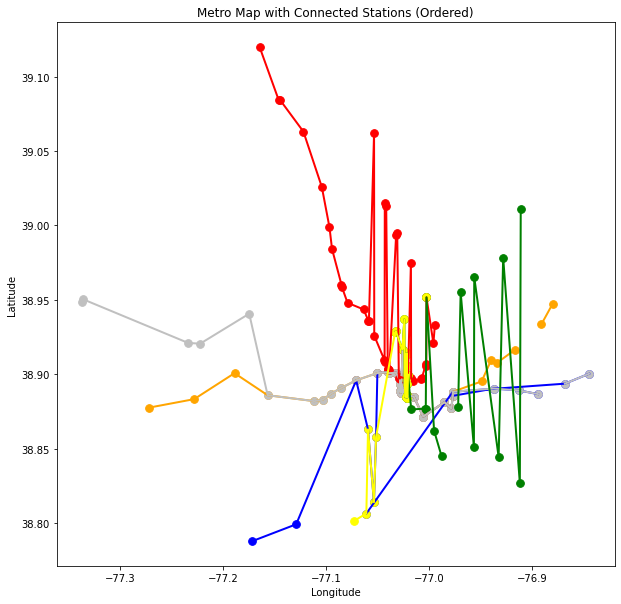

In [39]:
# Create LineStrings for each station's route
station_routes = {}
for index, row in df_exploded_unique.iterrows():
    station_name = row['NAME']
    line_color = row['LINE']
    visitors = row['VISITORS']
    coordinates = (row['Longitude'], row['Latitude'])
    station_routes.setdefault(line_color, []).append((station_name, coordinates))

# Plot the metro lines
fig, ax = plt.subplots(figsize=(10, 10))

# Plot stations and connect points of the same color in order
for line_color, stations in station_routes.items():
    # Sort stations based on longitude (or any other criteria that determines the order)
    stations.sort(key=lambda x: x[1][0])
    
    # Plot stations
    for station, coordinates in stations:
        ax.scatter(coordinates[0], coordinates[1], color=line_colors[line_color], s=visitors/100, label=station)
    
    # Connect points of the same color with lines
    station_coordinates = [station[1] for station in stations]
    ax.plot([coord[0] for coord in station_coordinates], [coord[1] for coord in station_coordinates], color=line_colors[line_color], linewidth=2)

plt.title('Metro Map with Connected Stations (Ordered)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.legend()
plt.show()


In [84]:
# Create a list of metro station names per line
blue_line_stations = [
    "FRANCONIA-SPRINGF'LD",
    "VAN DORN ST",
    "KING STREET",
    "BRADDOCK ROAD",
    "RONALD REAGAN WASHINGTON NATIONAL AIRPORT",
    "CRYSTAL CITY",
    "PENTAGON CITY",
    "PENTAGON",
    "ARLINGTON CEMETERY",
    "ROSSLYN",
    "FOGGY BOTTOM | GWU",
    "FARRAGUT WEST",
    "MCPHERSON SQUARE",
    "METRO CENTER",
    "FEDERAL TRIANGLE",
    "SMITHSONIAN",
    "L'ENFANT PLAZA",
    "FEDERAL CENTER SW",
    "CAPITOL SOUTH",
    "EASTERN MARKET",
    "POTOMAC AVE",
    "STADIUM | ARMORY",
    "BENNING ROAD",
    "CAPITOL HEIGHTS",
    "ADDISON ROAD | SEAT PLEASANT",
    "MORGAN BOULEVARD",
    "LARGO TOWN CENTER"
]

orange_line_stations =  [
    "VIENNA",
    "DUNN LORING",
    "WEST FALLS CHURCH",
    "EAST FALLS CHURCH",
    "BALLSTON",
    "VIRGINIA SQUARE",
    "CLARENDON",
    "COURT HOUSE",
    "ROSSLYN",
    "FOGGY BOTTOM",
    "FARRAGUT WEST",
    "MCPHERSON SQUARE",
    "METRO CENTER",
    "FEDERAL TRIANGLE",
    "SMITHSONIAN",
    "L'ENFANT",
    "FEDERAL CENTER",
    "CAPITOL SOUTH",
    "EASTERN MARKET",
    "POTOMAC AVE",
    "STADIUM-ARMORY",
    "MINNESOTA AVE",
    "DEANWOOD",
    "CHEVERLY",
    "LANDOVER",
    "NEW CARROLLTON"
]

silver_line_stations = [
    "WIEHLE | RESTON EAST",
    "SPRINGHILL",
    "GREENSBORO",
    "TYSONS CORNER",
    "MCLEAN",
    "EAST FALLS CHURCH",
    "BALLSTON",
    "VIRGINIA SQUARE | GMU ELEVATOR",
    "CLARENDON",
    "COURT HOUSE",
    "ROSSLYN",
    "FOGGY BOTTOM | GWU ELEVATOR",
    "FARRAGUT WEST",
    "MCPHERSON SQUARE ELEVATOR",
    "METRO CENTER",
    "FEDERAL TRIANGLE ELEVATOR",
    "SMITHSONIAN",
    "L'ENFANT PLAZA",
    "FEDERAL CENTER SW ELEVATOR",
    "CAPITOL SOUTH",
    "EASTERN MARKET",
    "POTOMAC AVE",
    "STADIUM | ARMORY",
    "BENNING ROAD ELEVATOR",
    "CAPITOL HEIGHTS ELEVATOR",
    "ADDISON ROAD | SEAT PLEASANT",
    "MORGAN BOULEVARD",
    "LARGO TOWN CENTER"
]

red_line_stations = [
    "SHADY GROVE",
    "ROCKVILLE",
    "TWINBROOK",
    "WHITE FLINT",
    "GROSVENOR-STRATHMORE",
    "MEDICAL CENTER",
    "BETHESDA",
    "FRIENDSHIP HEIGHTS",
    "TENLEYTOWN",
    "VAN NESS",
    "CLEVELAND PARK",
    "WOODLEY PARK | ZOO | ADAMS MORGAN",
    "DUPONT CIRCLE",
    "FARRAGUT NORTH",
    "METRO CENTER",
    "GALLERY PL | CHINATOWN",
    "JUDICIARY SQUARE",
    "UNION STATION",
    "NOMA | GALLAUDET U | NEW YORK AVE",
    "RHODE ISLAND AVE | BRENTWOOD",
    "BROOKLAND | CUA",
    "FORT TOTTEN",
    "TAKOMA",
    "SILVER SPRING",
    "FOREST GLEN",
    "GLENMONT"
]

green_line_stations =  [
    "GREENBELT",
    "COLLEGE PARK",
    "PRINCE GEORGE'S PLAZA",
    "WEST HYATTSVILLE",
    "FORT TOTTEN",
    "GEORGIA AVE",
    "COLUMBIA HEIGHTS",
    "U ST",
    "SHAW-HOWARD",
    "MT VERNON SQ",
    "GALLERY PL",
    "ARCHIVES",
    "L'ENFANT",
    "WATERFRONT",
    "NAVY YARD",
    "ANACOSTIA",
    "CONGRESS HEIGHTS",
    "SOUTHERN AVE",
    "NAYLOR ROAD",
    "SUITLAND",
    "BRANCH AVE"
]

yellow_line_stations = [
    "FORT TOTTEN",
    "GEORGIA AVENUE",
    "COLUMBIA HEIGHTS",
    "U STREET",
    "SHAW-HOWARD",
    "MT VERNON SQUARE",
    "GALLERY PLACE",
    "ARCHIVES",
    "L'ENFANT",
    "PENTAGON",
    "CRYSTAL CITY",
    "REAGAN",
    "BRADDOCK ROAD",
    "KING STREET",
    "EISENHOWER AVENUE",
    "HUNTINGTON"
]

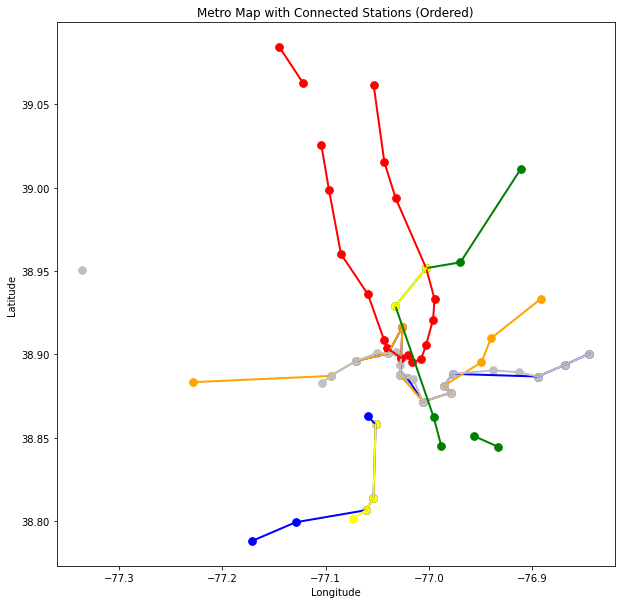

In [85]:
# Create a dictionary to map line names to their corresponding station lists
line_station_map = {
    'blue': blue_line_stations,
    'orange': orange_line_stations,
    'silver': silver_line_stations,
    'red': red_line_stations,
    'green': green_line_stations,
    'yellow': yellow_line_stations
}

# Create a list to store the ordered lines
ordered_lines = []

# Iterate over the provided station lists and append the line name to ordered_lines
for line, stations in line_station_map.items():
    ordered_lines.append((line, stations))

# Plot the metro lines
fig, ax = plt.subplots(figsize=(10, 10))

# Plot stations and connect points of the same color in order
for line_color, stations in ordered_lines:
    # Create a dictionary to store the coordinates of each station
    station_coordinates = {}
    
    # Retrieve the coordinates of each station from the DataFrame
    for station in stations:
        station_data = df_exploded_unique[df_exploded_unique['NAME'] == station]
        if not station_data.empty:
            station_coordinates[station] = (station_data.iloc[0]['Longitude'], station_data.iloc[0]['Latitude'])
    
    # Sort the stations based on their order in the provided list
    sorted_stations = [(station, station_coordinates[station]) for station in stations if station in station_coordinates]
    
    # Plot stations
    for station, coordinates in sorted_stations:
        ax.scatter(coordinates[0], coordinates[1], color=line_colors[line_color], s=visitors/100, label=station)
    
    # Connect points of the same color with lines
    station_coordinates = [station[1] for station in sorted_stations]
    ax.plot([coord[0] for coord in station_coordinates], [coord[1] for coord in station_coordinates], color=line_colors[line_color], linewidth=2)

plt.title('Metro Map with Connected Stations (Ordered)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.legend()
plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


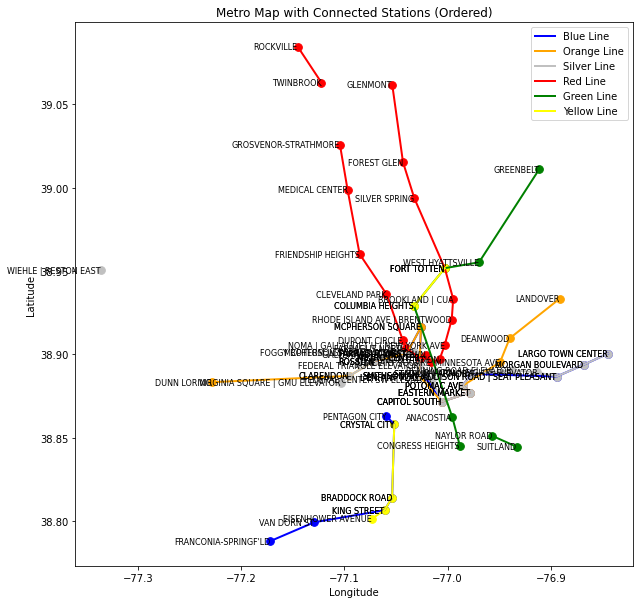

In [89]:
# Create a dictionary to map line names to their corresponding station lists
line_station_map = {
    'blue': blue_line_stations,
    'orange': orange_line_stations,
    'silver': silver_line_stations,
    'red': red_line_stations,
    'green': green_line_stations,
    'yellow': yellow_line_stations

}

# Create a list to store the ordered lines
ordered_lines = []

# Iterate over the provided station lists and append the line name to ordered_lines
for line, stations in line_station_map.items():
    ordered_lines.append((line, stations))

# Plot the metro lines
fig, ax = plt.subplots(figsize=(10, 10))

# Plot stations and connect points of the same color in order
for line_color, stations in ordered_lines:
    # Create a dictionary to store the coordinates of each station
    station_coordinates = {}
    
    # Retrieve the coordinates of each station from the DataFrame
    for station in stations:
        station_data = df_exploded_unique[df_exploded_unique['NAME'] == station]
        if not station_data.empty:
            station_coordinates[station] = (station_data.iloc[0]['Longitude'], station_data.iloc[0]['Latitude'])
    
    # Sort the stations based on their order in the provided list
    sorted_stations = [(station, station_coordinates[station]) for station in stations if station in station_coordinates]
    
    # Plot stations and their names next to the points
    for station, coordinates in sorted_stations:
        ax.scatter(coordinates[0], coordinates[1], color=line_colors[line_color], s=visitors/100)
        ax.text(coordinates[0], coordinates[1], station, fontsize=8, ha='right', va='center', color='black')
    
    # Connect points of the same color with lines
    station_coordinates = [station[1] for station in sorted_stations]
    ax.plot([coord[0] for coord in station_coordinates], [coord[1] for coord in station_coordinates], color=line_colors[line_color], linewidth=2, label=line_color.capitalize() + " Line")

plt.title('Metro Map with Connected Stations (Ordered)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


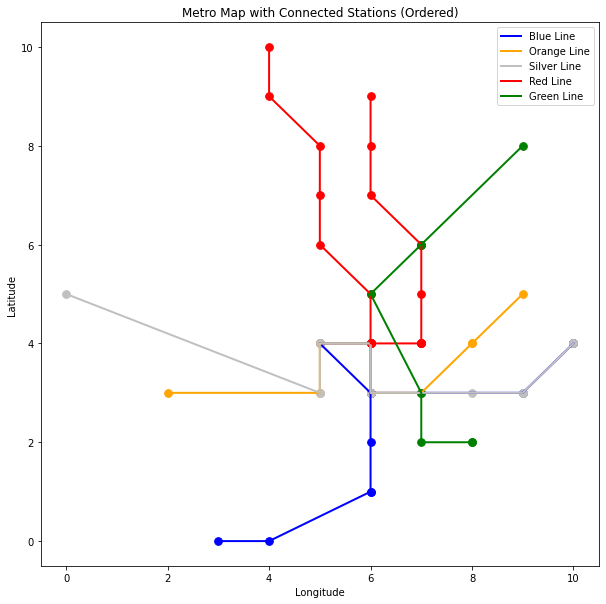

In [136]:
import math
# Create a dictionary to map line names to their corresponding station lists
line_station_map = {
    'blue': blue_line_stations,
    'orange': orange_line_stations,
    'silver': silver_line_stations,
    'red': red_line_stations,
    'green': green_line_stations
}

# Create a list to store the ordered lines
ordered_lines = []

# Iterate over the provided station lists and append the line name to ordered_lines
for line, stations in line_station_map.items():
    ordered_lines.append((line, stations))

# Define the size of the grid
grid_size = 10

def snap_to_grid(coordinate, min_coor, max_coor):
    grid_cell_size=(max_coor[0]-min_coor[0])/grid_size #coordinate here means coordinate for the whole map, not just this one
    cell_number_X=(coordinate[0]-min_coor[0])//grid_cell_size
    normalised_epsilon=((coordinate[0]-min_coor[0])%grid_cell_size)/grid_cell_size
    x=round(normalised_epsilon)+cell_number_X

    grid_cell_size=(max_coor[1]-min_coor[1])/grid_size #coordinate here means coordinate for the whole map, not just this one
    cell_number_Y=(coordinate[1]-min_coor[1])//grid_cell_size
    normalised_epsilon=((coordinate[1]-min_coor[1])%grid_cell_size)/grid_cell_size
    y=round(normalised_epsilon)+cell_number_Y

    return (x, y)

# Create a list to store all coordinates
all_coordinates = []

# Iterate over the provided station lists and append the line name to ordered_lines
for line_color, stations in line_station_map.items():
    for station in stations:
        station_data = df_exploded_unique[df_exploded_unique['NAME'] == station]
        if not station_data.empty:
            all_coordinates.append((station_data.iloc[0]['Longitude'], station_data.iloc[0]['Latitude']))

# Find the minimum and maximum coordinates
min_coor = np.nanmin(all_coordinates, axis=0)
max_coor = np.nanmax(all_coordinates, axis=0)

# Plot the metro lines
fig, ax = plt.subplots(figsize=(10, 10))

# Create a list to store the lines for the legend
legend_lines = []

# Plot stations and connect points of the same color in order
for line_color, stations in ordered_lines:
    # Create a dictionary to store the coordinates of each station
    station_coordinates = {}
    
    # Retrieve the coordinates of each station from the DataFrame
    for station in stations:
        station_data = df_exploded_unique[df_exploded_unique['NAME'] == station]
        if not station_data.empty:
            station_coordinates[station] = (station_data.iloc[0]['Longitude'], station_data.iloc[0]['Latitude'])
    
    # Sort the stations based on their order in the provided list
    sorted_stations = [(station, station_coordinates[station]) for station in stations if station in station_coordinates]
    
    # Plot stations and their names next to the points, snapped to the grid
    for index, (station, coordinates) in enumerate(sorted_stations):
        if not any(math.isnan(coord) for coord in coordinates):
            snapped_coordinates = snap_to_grid(coordinates, min_coor, max_coor)
            ax.scatter(snapped_coordinates[0], snapped_coordinates[1], color=line_colors[line_color], s=visitors/100)
            # ax.text(snapped_coordinates[0], snapped_coordinates[1], station, fontsize=8, ha='right', va='center', color='black')
            
    # Connect points of the same color with lines
    station_coordinates = [snap_to_grid(station[1], min_coor, max_coor) for index, station in enumerate(sorted_stations) if not any(math.isnan(coord) for coord in station[1])]
    line, = ax.plot([coord[0] for coord in station_coordinates], [coord[1] for coord in station_coordinates], color=line_colors[line_color], linewidth=2, label=line_color.capitalize() + " Line")
    legend_lines.append(line)

# Add legend for lines
ax.legend(handles=legend_lines)

plt.title('Metro Map with Connected Stations (Ordered)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
